## Case Studies in Risk Management GWP Submission 1

**1	Data Importing**


1.1	Choose a financial crisis of the last 100 years.  Be sure that you can find data for the crisis you select.  (Otherwise, select a different crisis)


* We decided to choose the Financial crisis of 2007–2008, as it`s one of the most recent and there is plenty of reliable data available. 

1.2	Identify the key market factors


* Interest Rates
* Housing prices
* Increased Credit Risk
* Leverage ratios of investment banks
* Household debt

**2	Data Processing**

2.1 Find at least 5 securities, macroeconomic indicators, or other factors that were signficantly affected by the crisis.

2.2 Be sure to collect data that starts 6 months prior to the crisis, and goes 6 months after the crisis.

2.3 Download them into Python


In [1]:
from fredapi import Fred
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import yfinance as yf
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import dateutil
start = '2006-05-01'
end = '2010-12-31'
fred = Fred(api_key='09573ec1dc0c523e914163ab565c56e8')

* Macroeconomic indicators:

In [3]:
DFF = fred.get_series('DFF', observation_start=start, observation_end=end).resample('1m').nearest() #Federal Funds Effective Rate
CSUSHPINSA = fred.get_series('CSUSHPINSA', observation_start=start, observation_end=end).resample('1m').nearest() #S&P/Case-Shiller U.S. National Home Price Index
TEDRATE = fred.get_series('TEDRATE', observation_start=start, observation_end=end).resample('1m').nearest() #TED Spread
A939RX0Q048SBEA = fred.get_series('A939RX0Q048SBEA', observation_start=start, observation_end=end).resample('1m').nearest() #Real gross domestic product per capita
TDSP = fred.get_series('TDSP', observation_start=start, observation_end=end).resample('1m').nearest() #Household Debt Service Payments as a Percent of Disposable Personal Income
HDTGPDUSQ163N = fred.get_series('HDTGPDUSQ163N', observation_start=start, observation_end=end).resample('1m').nearest() #Household Debt to GDP for United States
UNRATE = fred.get_series('UNRATE', observation_start=start, observation_end=end).resample('1m').nearest() #Unemployment Rate

     *    The TED spread (in red), an indicator of perceived risk in the general economy, increased significantly    during the financial crisis, reflecting an increase in perceived credit risk. The TED spread spiked up in July 2007, remained volatile for a year, then spiked even higher in September 2008, reaching a record 4.65% on October 10, 2008.

* Securities:


In [4]:
securities = 'SPY FMCC ^TNX IWM USO AIG ^VIX'

In [5]:
data_securities = yf.download(securities, threads = True, start=start, end=end, interval='1mo')

[*********************100%***********************]  7 of 7 completed


In [6]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)
data_securities["Adj Close"].dropna()

,AIG,FMCC,IWM,SPY,USO,^TNX,^VIX
Date,,,,,,,
2006-05-01,799.599182,55.461277,57.993008,93.135620,541.840027,5.113,16.440001
2006-06-01,778.511475,52.662350,57.880035,92.967583,558.159973,5.138,13.080000
2006-07-01,799.869568,53.880791,56.312057,93.796692,556.159973,4.988,14.950000
2006-08-01,841.398987,59.226028,58.001083,95.843582,518.400024,4.732,12.310000
2006-09-01,875.840027,61.768280,58.186962,98.000519,456.000000,4.633,11.980000
2006-10-01,887.868591,64.719879,61.802696,101.533768,416.799988,4.606,11.100000
2006-11-01,929.506042,63.003155,63.294422,103.552765,436.640015,4.458,10.910000
2006-12-01,949.461182,63.697361,63.261978,104.355957,412.799988,4.710,11.560000
2007-01-01,906.930298,61.355072,64.605164,106.515701,385.920013,4.826,10.420000


2.4	Be sure to align their frequencies (e.g. some may be daily, some may be quarterly)


In [7]:
Macro_df = pd.concat([DFF, CSUSHPINSA, TEDRATE, A939RX0Q048SBEA, TDSP, HDTGPDUSQ163N, UNRATE], axis=1)

In [8]:
Macro_df.columns = ['Fed Rate', 'Home Price Index', 'TED Spread', 'GDP', 'Household Debt', 
                'Household Debt to GDP', 'Unemployment Rate']
Macro_df.drop(["2006-04-30"], axis=0, inplace=True)
macro_index = data_securities["Adj Close"].dropna().index
Macro_df.index = macro_index

In [9]:
Macro_df.fillna(method='ffill')

,Fed Rate,Home Price Index,TED Spread,GDP,Household Deb,Household Debt to GDP,Unemployment Rate
Date,,,,,,,
2006-05-01,5.05,184.547,0.50,51155.0,12.779304,96.907416,4.6
2006-06-01,5.05,184.607,0.61,51155.0,12.779304,96.907416,4.7
2006-07-01,5.31,184.404,0.50,51155.0,12.779304,96.907416,4.7
2006-08-01,5.31,184.198,0.48,51455.0,12.866873,98.906236,4.5
2006-09-01,5.34,184.055,0.60,51455.0,12.866873,98.906236,4.4
2006-10-01,5.31,183.633,0.42,51455.0,12.866873,98.906236,4.5
2006-11-01,5.31,183.231,0.47,51492.0,12.896722,95.623711,4.4
2006-12-01,5.17,182.719,0.47,51492.0,12.896722,95.623711,4.6
2007-01-01,5.33,182.472,0.37,51492.0,12.896722,95.623711,4.5


2.5	Also, compute their returns.  It is at your discreation if your returns are daily, weekly, or monthly.


In [10]:
Macro_returns = Macro_df.pct_change().dropna()
Macro_returns

,Fed Rate,Home Price Index,TED Spread,GDP,Household Deb,Household Debt to GDP,Unemployment Rate
Date,,,,,,,
2006-06-01,0.000000,0.000325,0.220000,0.000000,0.000000,0.000000,0.021739
2006-07-01,0.051485,-0.001100,-0.180328,0.000000,0.000000,0.000000,0.000000
2006-08-01,0.000000,-0.001117,-0.040000,0.005865,0.006852,0.020626,-0.042553
2006-09-01,0.005650,-0.000776,0.250000,0.000000,0.000000,0.000000,-0.022222
2006-10-01,-0.005618,-0.002293,-0.300000,0.000000,0.000000,0.000000,0.022727
2006-11-01,0.000000,-0.002189,0.119048,0.000719,0.002320,-0.033188,-0.022222
2006-12-01,-0.026365,-0.002794,0.000000,0.000000,0.000000,0.000000,0.045455
2007-01-01,0.030948,-0.001352,-0.212766,0.000000,0.000000,0.000000,-0.021739
2007-02-01,0.015009,-0.001524,-0.081081,0.004137,0.003497,0.022041,-0.022222


In [11]:
securities_return = data_securities["Adj Close"].dropna().pct_change().dropna()
securities_return

,AIG,FMCC,IWM,SPY,USO,^TNX,^VIX
Date,,,,,,,
2006-06-01,-0.026373,-0.050466,-0.001948,-0.001804,0.030119,0.004890,-0.204380
2006-07-01,0.027435,0.023137,-0.027090,0.008918,-0.003583,-0.029194,0.142966
2006-08-01,0.051920,0.099205,0.029994,0.021823,-0.067894,-0.051323,-0.176589
2006-09-01,0.040933,0.042925,0.003205,0.022505,-0.120370,-0.020921,-0.026808
2006-10-01,0.013734,0.047785,0.062140,0.036053,-0.085965,-0.005828,-0.073456
2006-11-01,0.046896,-0.026525,0.024137,0.019885,0.047601,-0.032132,-0.017117
2006-12-01,0.021469,0.011019,-0.000513,0.007756,-0.054599,0.056528,0.059578
2007-01-01,-0.044795,-0.036772,0.021232,0.020696,-0.065116,0.024628,-0.098616
2007-02-01,-0.019576,-0.012321,-0.006553,-0.019618,0.060945,-0.057190,0.479846


**3	Visualizing data**


3.1	Graph them using at least 3 different EDA plots.  Possibilities include density plots, box plots, qq plots, Tukey-mean difference plots, conditional plots


* Density & qq plots of Macro data:

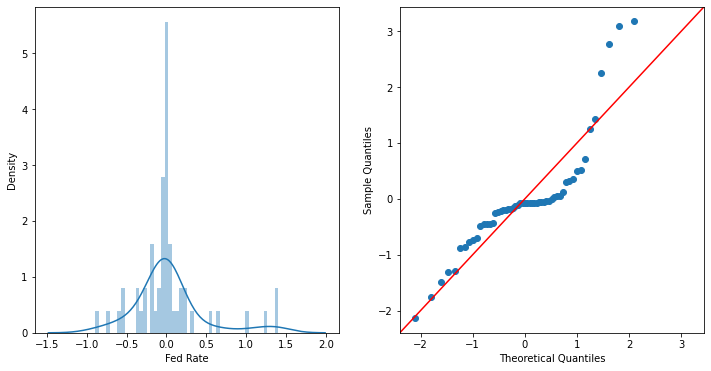

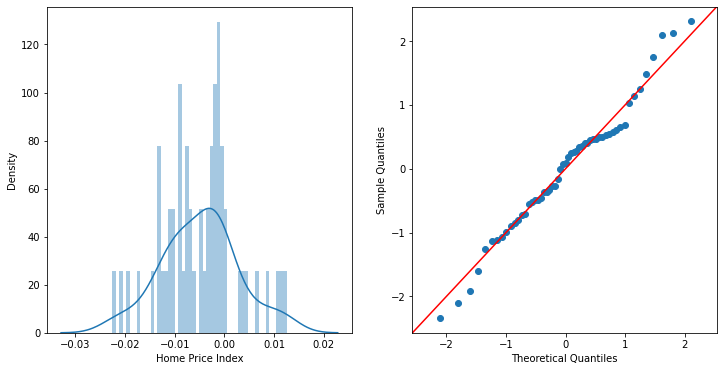

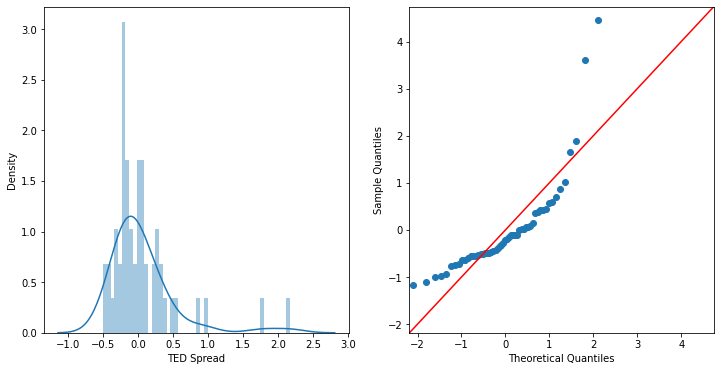

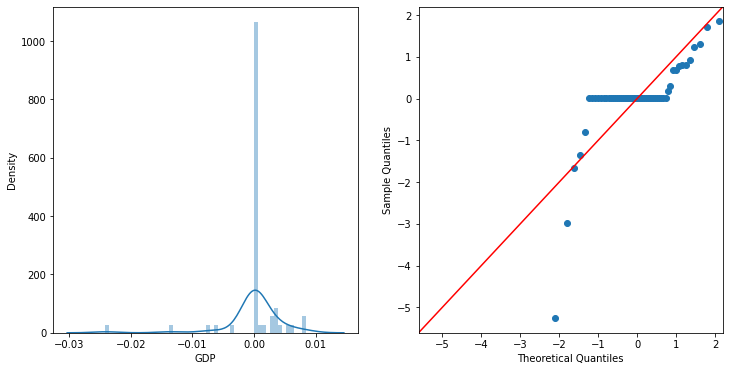

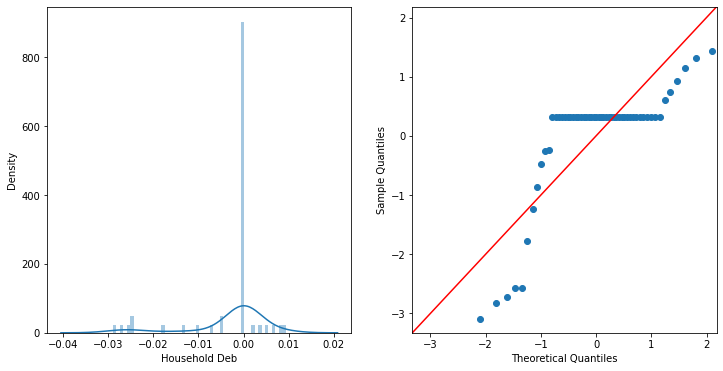

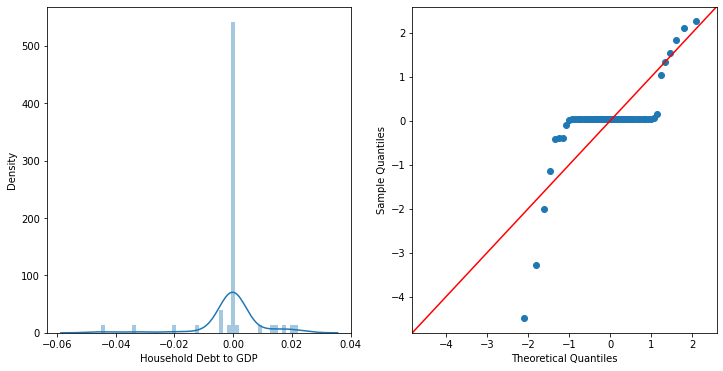

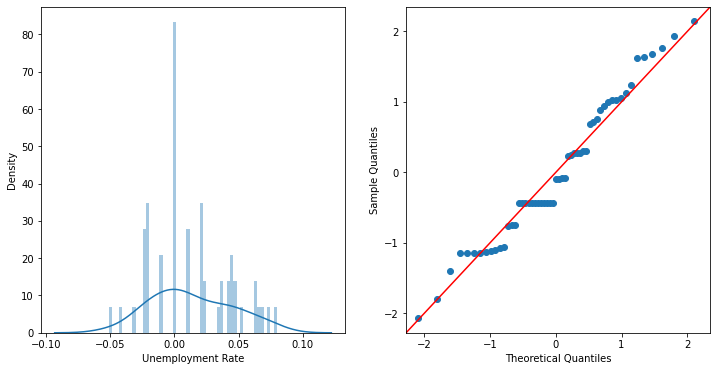

In [12]:
for i in Macro_returns:
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    sns.distplot(a=Macro_returns[i], ax=ax[0], bins=50)
    sm.qqplot(Macro_returns[i], fit=True, line="45", ax=ax[1])
    fig.show()

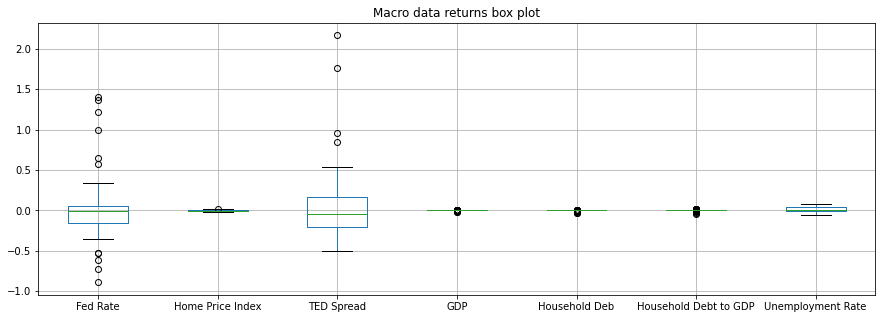

In [13]:
Macro_returns.boxplot(figsize=(15,5))
plt.title("Macro data returns box plot")
plt.show()

* Density & qq plots of Securities data:

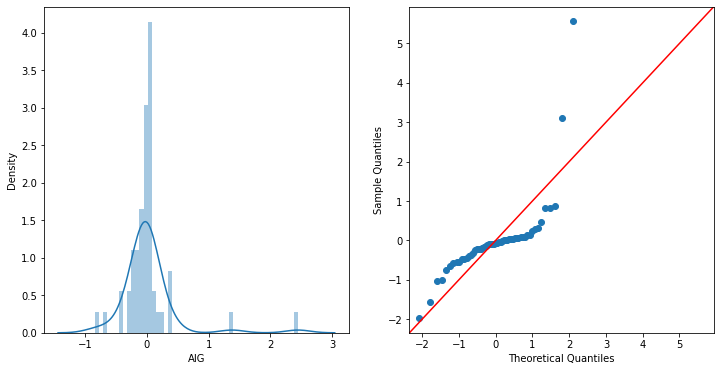

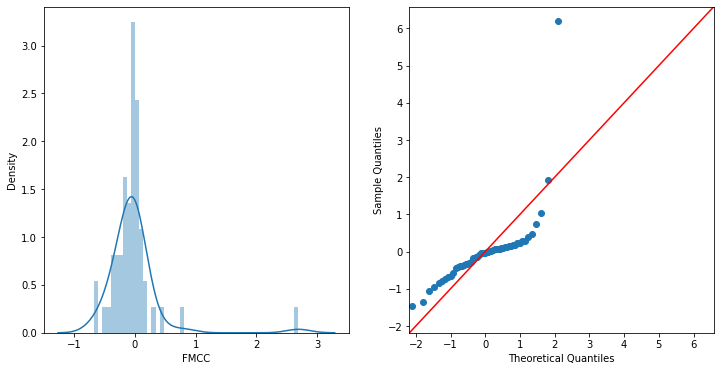

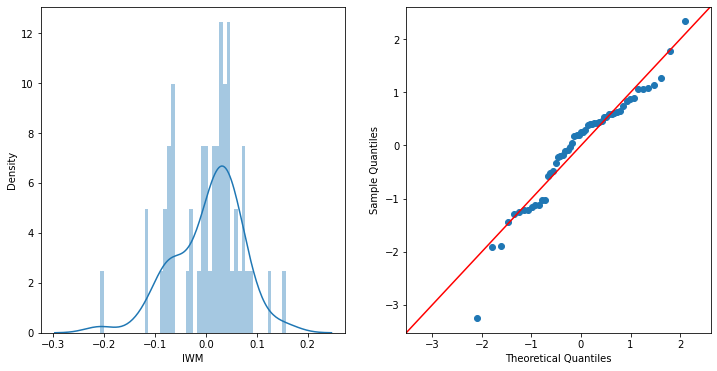

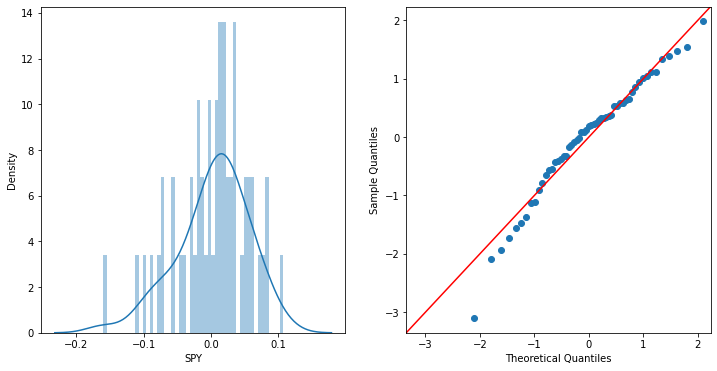

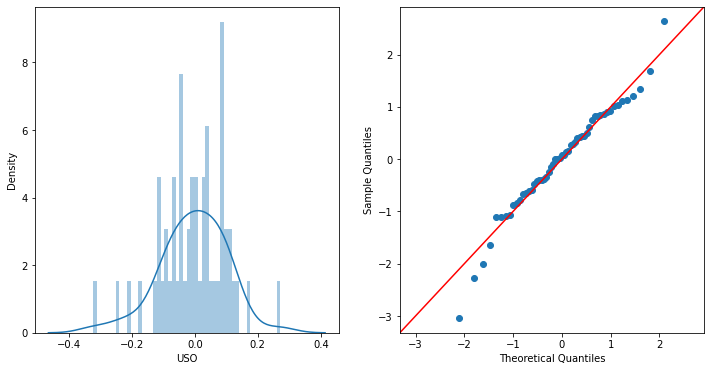

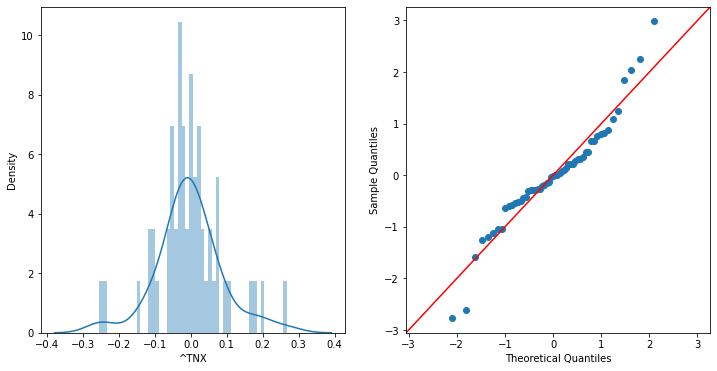

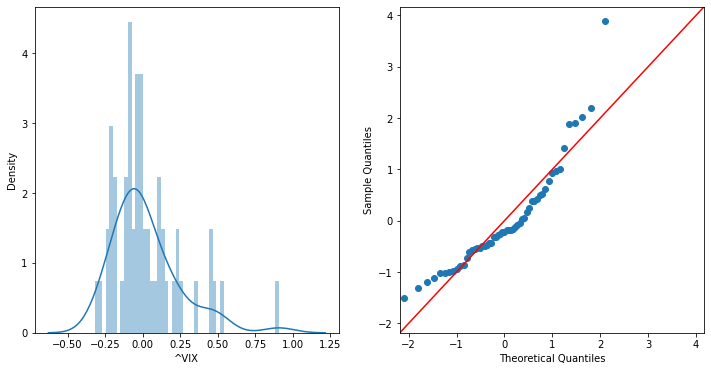

In [14]:
for i in securities_return:
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    sns.distplot(a=securities_return[i], ax=ax[0],bins=50)
    sm.qqplot(securities_return[i], fit=True, line="45", ax=ax[1])
    fig.show()

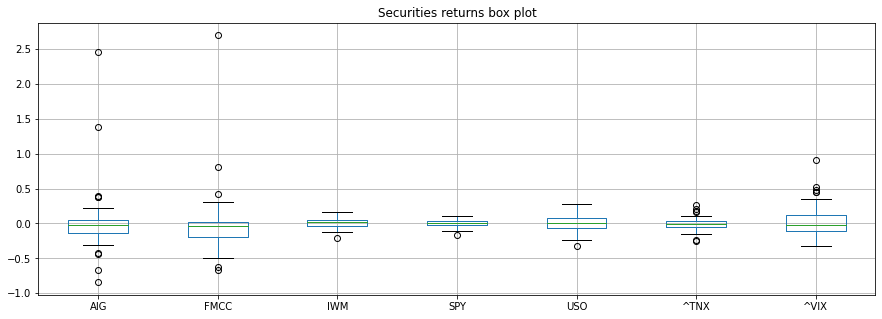

In [15]:
securities_return.boxplot(figsize=(15,5))
plt.title("Securities returns box plot")
plt.show()

3.2	Pick at least 2 of your series.  Show the values (prices, yields) at least 6 months prior to the crisis, and at least 6 months after the crisis 'starts'.


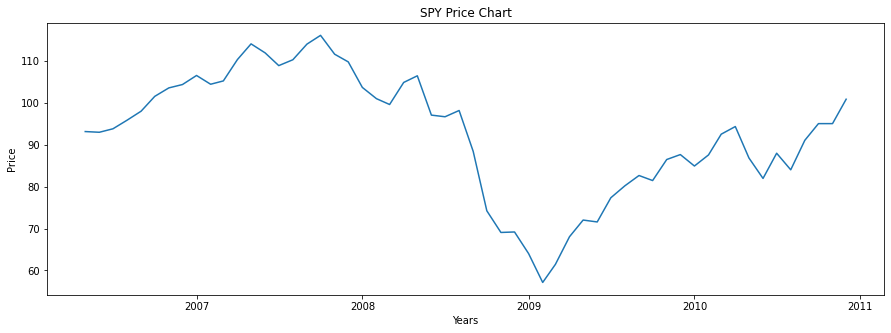

In [16]:
plt.figure(figsize = (15,5))
plt.plot(data_securities["Adj Close","SPY"].dropna())
plt.ylabel("Price")
plt.xlabel("Years")
plt.title("SPY Price Chart")
plt.show()

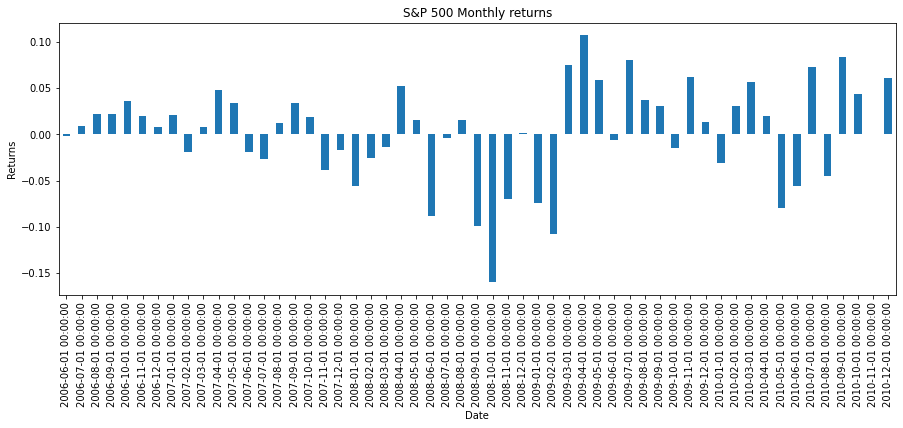

In [17]:
plt.figure(figsize = (15,5))
securities_return["SPY"].plot(title='S&P 500 Monthly returns', kind='bar')
plt.ylabel("Returns")
plt.show()

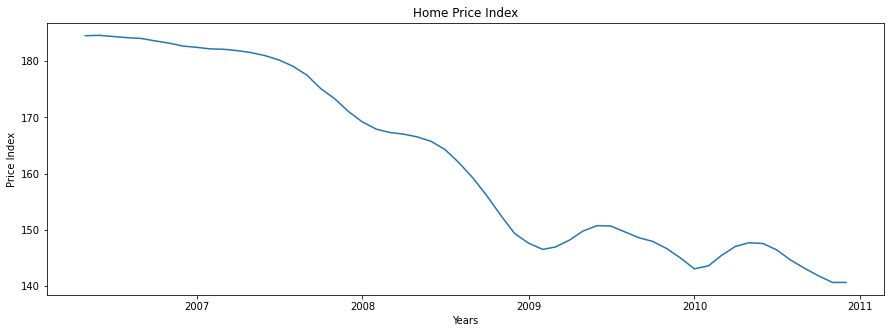

In [18]:
plt.figure(figsize = (15,5))
plt.plot(Macro_df['Home Price Index'])
plt.ylabel("Price Index")
plt.xlabel("Years")
plt.title("Home Price Index")
plt.show()

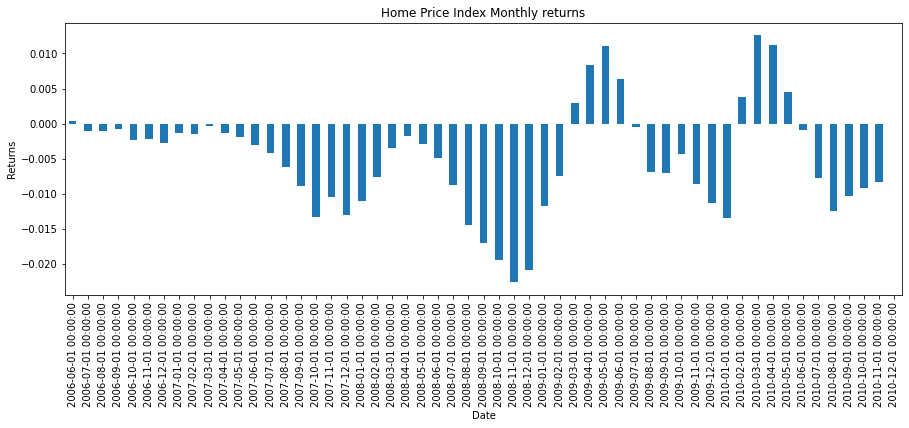

In [19]:
plt.figure(figsize = (15,5))
Macro_returns['Home Price Index'].plot(title='Home Price Index Monthly returns', kind='bar')
plt.ylabel("Returns")
plt.show()

**4	Data Summaries.   Extreme Values**


4.1	Compute means.  Compute the 5% trimmed mean.  What points were considered outliers?


* Mean and 5% trimmed mean of the Macro data:

In [107]:
for i in Macro_df.columns:
    outliers = Macro_returns[i].sort_values(ascending=True)
    print(outliers[:3],outliers[-3:])

Date
2008-10-01   -0.891626
2008-12-01   -0.730769
2009-12-01   -0.615385
Name: Fed Rate, dtype: float64 Date
2010-04-01    1.222222
2008-11-01    1.363636
2010-01-01    1.400000
Name: Fed Rate, dtype: float64
Date
2008-11-01   -0.022599
2008-12-01   -0.020866
2008-10-01   -0.019427
Name: Home Price Index, dtype: float64 Date
2009-05-01    0.010981
2010-04-01    0.011245
2010-03-01    0.012563
Name: Home Price Index, dtype: float64
Date
2009-09-01   -0.500000
2010-08-01   -0.466667
2008-05-01   -0.423611
Name: TED Spread, dtype: float64 Date
2007-11-01    0.952381
2008-09-01    1.763158
2007-08-01    2.166667
Name: TED Spread, dtype: float64
Date
2008-08-01   -0.024106
2008-11-01   -0.013663
2008-05-01   -0.007704
Name: GDP, dtype: float64 Date
2006-08-01    0.005865
2010-02-01    0.007754
2009-08-01    0.008348
Name: GDP, dtype: float64
Date
2010-02-01   -0.028950
2008-02-01   -0.026671
2009-11-01   -0.025758
Name: Household Deb, dtype: float64 Date
2006-08-01    0.006852
2007-05-01  

In [20]:
Macro_returns.mean()

Fed Rate                 0.029462
Home Price Index        -0.004900
TED Spread               0.054239
GDP                     -0.000095
Household Deb           -0.002769
Household Debt to GDP   -0.000478
Unemployment Rate        0.013357
dtype: float64

In [53]:
trimm_macro = stats.trim_mean(Macro_returns, 0.05)
trimm_macro = pd.DataFrame(trimm_macro, index=Macro_returns.columns, columns=["5% trimmed mean"])
trimm_macro

,5% trimmed mean
Fed Rate,0.009396
Home Price Index,-0.004899
TED Spread,0.000392
GDP,0.000322
Household Deb,-0.002244
Household Debt to GDP,0.000184
Unemployment Rate,0.013229


* Mean and 5% trimmed mean of the Securities data:

In [22]:
securities_return.mean()

AIG     0.017898
FMCC   -0.029982
IWM     0.004759
SPY     0.002871
USO    -0.004202
^TNX   -0.003711
^VIX    0.023249
dtype: float64

In [23]:
trimm_sec = stats.trim_mean(securities_return, 0.05)
trimm_sec = pd.DataFrame(trimm_sec, index=data_securities["Adj Close"].columns, columns=["5% trimmed mean"])
trimm_sec

,5% trimmed mean
AIG,-0.026066
FMCC,-0.075723
IWM,0.006082
SPY,0.004603
USO,-0.002135
^TNX,-0.003446
^VIX,0.008761


In [108]:
for i in securities_return.columns:
    outliers = securities_return[i].sort_values(ascending=True)
    print(outliers[:3],outliers[-3:])

Date
2008-09-01   -0.845044
2009-02-01   -0.671875
2009-07-01   -0.433621
Name: AIG, dtype: float64 Date
2010-12-01    0.395496
2009-03-01    1.380952
2009-08-01    2.449772
Name: AIG, dtype: float64
Date
2010-06-01   -0.669355
2008-09-01   -0.620843
2008-07-01   -0.496001
Name: FMCC, dtype: float64 Date
2009-12-01    0.427185
2009-03-01    0.809524
2009-08-01    2.693548
Name: FMCC, dtype: float64
Date
2008-10-01   -0.207885
2009-02-01   -0.119829
2008-11-01   -0.119256
Name: IWM, dtype: float64 Date
2009-07-01    0.087901
2010-09-01    0.121635
2009-04-01    0.157627
Name: IWM, dtype: float64
Date
2008-10-01   -0.160354
2009-02-01   -0.107450
2008-09-01   -0.099387
Name: SPY, dtype: float64 Date
2009-07-01    0.080676
2010-09-01    0.083753
2009-04-01    0.107215
Name: SPY, dtype: float64
Date
2008-10-01   -0.322156
2008-11-01   -0.242849
2008-12-01   -0.213590
Name: USO, dtype: float64 Date
2008-04-01    0.136922
2007-10-01    0.171383
2009-05-01    0.271394
Name: USO, dtype: float6

In [54]:
trimm_macro.T-Macro_returns.mean()

,Fed Rate,Home Price Index,TED Spread,GDP,Household Deb,Household Debt to GDP,Unemployment Rate
5% trimmed mean,-0.020067,0.000001,-0.053847,0.000417,0.000525,0.000662,-0.000128


4.2	Compute the inter-quartile range.  Compute the standard deviation.  How do these relate?


In [24]:
from scipy.stats import iqr

In [25]:
count=-1
for i in Macro_df.columns:
    count+=1
    inter_quartile = iqr(Macro_returns[i])
    print(Macro_returns.columns[count],":",inter_quartile)

Fed Rate : 0.21108792304283425
Home Price Index : 0.008662939357074795
TED Spread : 0.37246498599439776
GDP : 0.0
Household Deb : 0.0
Household Debt to GDP : 0.0
Unemployment Rate : 0.048977186834329556


In [26]:
Macro_returns.std()

Fed Rate                 0.436134
Home Price Index         0.007642
TED Spread               0.478046
GDP                      0.004614
Household Deb            0.008524
Household Debt to GDP    0.010062
Unemployment Rate        0.031395
dtype: float64

In [27]:
count=-1
for i in securities_return.columns:
    count+=1
    inter_quartile = iqr(securities_return[i])
    print(securities_return.columns[count],":",inter_quartile)

AIG : 0.18218262238121796
FMCC : 0.22161248476999817
IWM : 0.07578877468376277
SPY : 0.05771705605104405
USO : 0.144539177391869
^TNX : 0.08000370202943297
^VIX : 0.21834413193584834


In [28]:
securities_return.std()

AIG     0.441477
FMCC    0.443216
IWM     0.066076
SPY     0.053150
USO     0.105622
^TNX    0.091769
^VIX    0.228963
dtype: float64

4.3	Compute the skewness of each series. 


In [29]:
Macro_returns.skew()

Fed Rate                 1.371599
Home Price Index         0.052227
TED Spread               2.623835
GDP                     -2.993826
Household Deb           -1.969919
Household Debt to GDP   -1.881359
Unemployment Rate        0.264795
dtype: float64

In [30]:
securities_return.skew()

AIG     3.525385
FMCC    4.430510
IWM    -0.666591
SPY    -0.707669
USO    -0.441130
^TNX    0.134843
^VIX    1.516818
dtype: float64

4.4	Compute the median of each series.  Compare to the mean.  Compare this difference to the skewness.


In [31]:
Macro_returns.median()

Fed Rate                -0.001890
Home Price Index        -0.004188
TED Spread              -0.050000
GDP                      0.000000
Household Deb            0.000000
Household Debt to GDP    0.000000
Unemployment Rate        0.010204
dtype: float64

In [32]:
securities_return.median()

AIG    -0.017139
FMCC   -0.042201
IWM     0.021232
SPY     0.012833
USO     0.003320
^TNX   -0.005828
^VIX   -0.026808
dtype: float64

* Compare to the mean:

In [60]:
Macro_returns.mean()

Fed Rate                 0.029462
Home Price Index        -0.004900
TED Spread               0.054239
GDP                     -0.000095
Household Deb           -0.002769
Household Debt to GDP   -0.000478
Unemployment Rate        0.013357
dtype: float64

In [61]:
Macro_returns.mean()-Macro_returns.median()

Fed Rate                 0.031352
Home Price Index        -0.000712
TED Spread               0.104239
GDP                     -0.000095
Household Deb           -0.002769
Household Debt to GDP   -0.000478
Unemployment Rate        0.003153
dtype: float64

In [62]:
securities_return.mean()-securities_return.median()

AIG     0.035037
FMCC    0.012219
IWM    -0.016474
SPY    -0.009962
USO    -0.007523
^TNX    0.002117
^VIX    0.050057
dtype: float64

4.5	Compute the kurtosis. Bootstrap the standard deviation.  How does the volatility of the standard deviations estimate compare to the kurtosis?


In [33]:
Macro_returns.kurtosis()

Fed Rate                  3.319167
Home Price Index          0.198843
TED Spread                8.716617
GDP                      14.332365
Household Deb             3.256045
Household Debt to GDP     8.885886
Unemployment Rate        -0.668467
dtype: float64

In [34]:
securities_return.kurtosis()

AIG     18.280724
FMCC    26.866882
IWM      1.016246
SPY      0.697620
USO      1.102685
^TNX     2.006255
^VIX     3.249649
dtype: float64

4.6	What do these metrics infer about the data generation process?


**5	Data Modeling**


5.1	Pick 1 of the returns distributions.  Does a normal distribution fit this well?  Why or why not?


<AxesSubplot:xlabel='FMCC', ylabel='Density'>

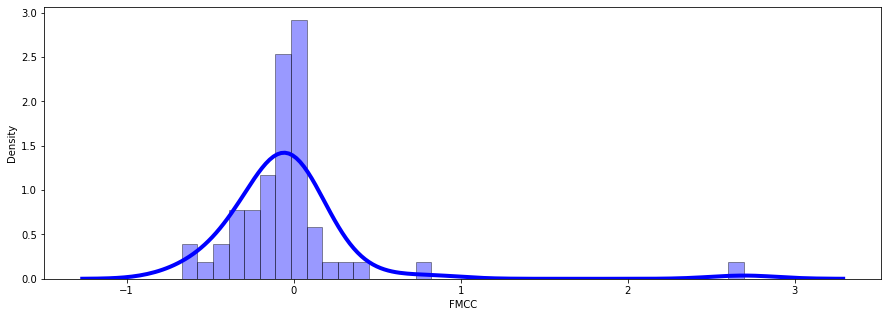

In [35]:
plt.figure(figsize = (15,5))
sns.distplot(securities_return["FMCC"], hist=True, kde=True, bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

5.2	Pick a 2nd security's return distributions.  Repeat: Does a normal distribution fit this well?  Why or why not?


<AxesSubplot:xlabel='SPY', ylabel='Density'>

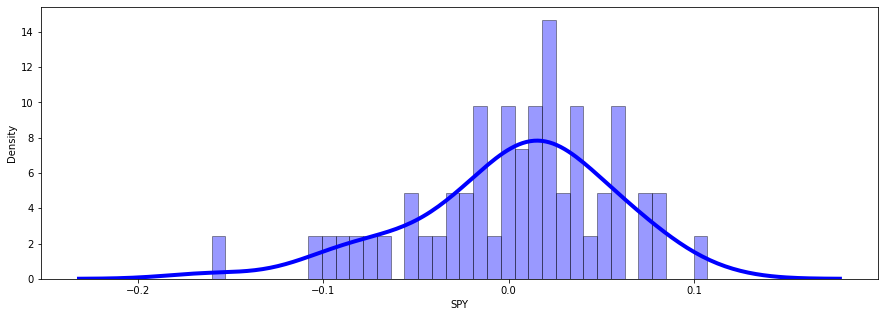

In [36]:
plt.figure(figsize = (15,5))
sns.distplot(securities_return["SPY"], hist=True, kde=True, bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

5.3	Find heavy-tailed distributions that can fit your choices from 4.1 and 4.2


<AxesSubplot:xlabel='AIG', ylabel='Density'>

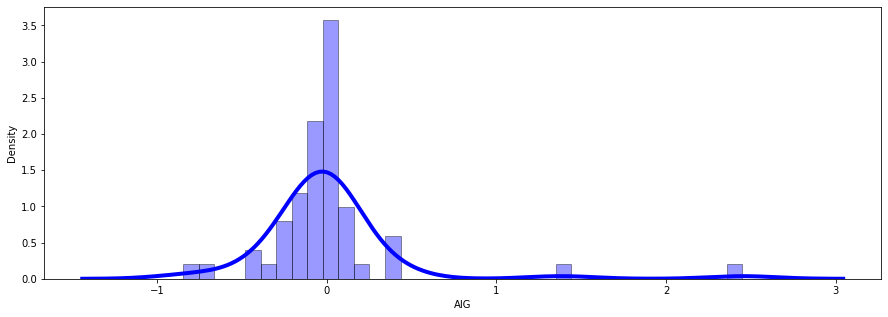

In [42]:
plt.figure(figsize = (15,5))
sns.distplot(securities_return["AIG"], hist=True, kde=True, bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<AxesSubplot:xlabel='GDP', ylabel='Density'>

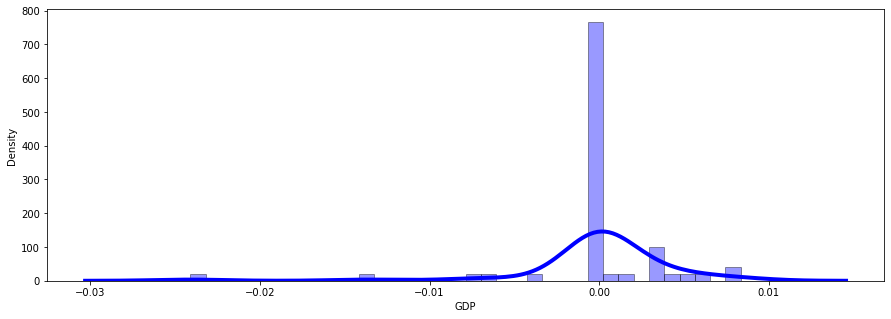

In [50]:
plt.figure(figsize = (15,5))
sns.distplot(Macro_returns["GDP"], hist=True, kde=True, bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

5.4	For each of the series you modeled, which fits better: the Gaussian distribution of the heavy-tailed distribution.  Justify your reasoning.


**6	Modeling Before and After the Crisis**


6.1	Run any model from econometrics: LS, ARMA, GARCH, Cointegration, to model the behevaior of the series PRIOR to the crisis


6.2	Run the same model, but only use the data after the crisis.


6.3	Determine any mean-reverting relationships
